# Project 1 - Part 1 (Core)
 - Author: Walaa abdalaziz


Project Overview

Load and Inspect Data

In [14]:
import pandas as pd
fname = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/sales_predictions_2023 (1).csv"
df = pd.read_csv(fname)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Clean Data

In [ ]:
print("raws and columns of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
duplicates = df.duplicated().sum()

print("\nNumber of duplicate rows:", duplicates)
df = df.drop_duplicates()
print("\nMissing Values:\n", df.isnull().sum())

df.fillna("0", inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat'})
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat'})

min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)
mean_values = df.mean(numeric_only=True)

print("\nMinimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)
print("\nMean Values:\n", mean_values)

raws and columns of the dataset: (8523, 12)

Data Types:
 Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Number of duplicate rows: 0

Missing Values:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Missing Values After Cleaning:
 Item_Identifier    

Exploratory Data Analysis

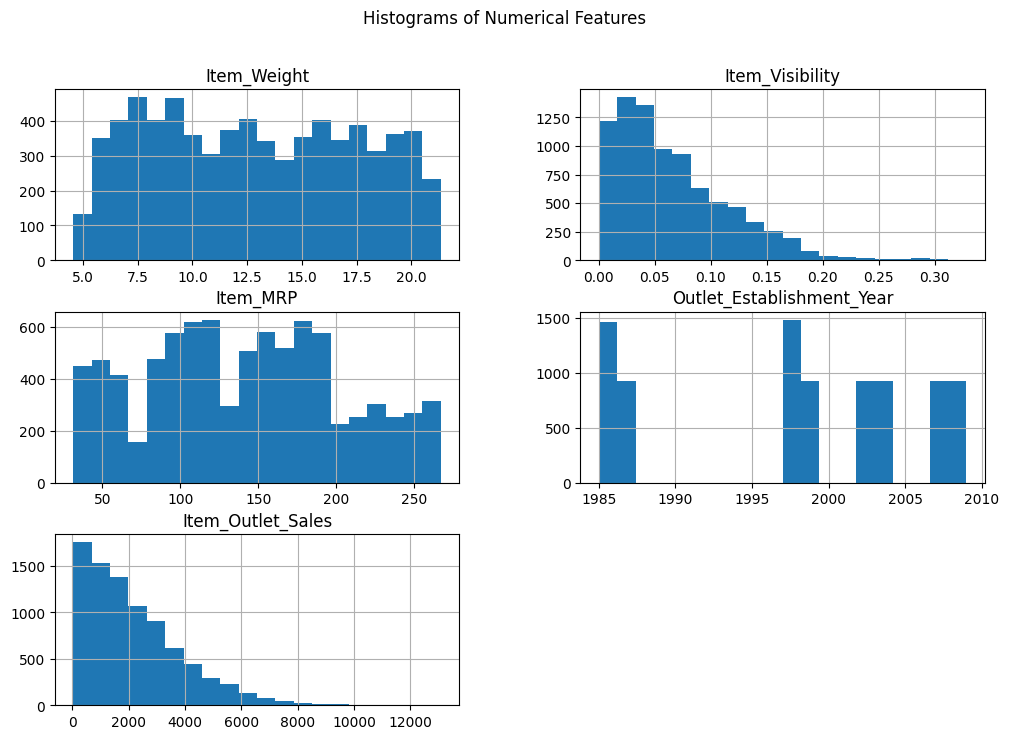

In [ ]:
#Histograms to view the distributions of numerical features in your dataset.
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create histograms for numeric columns
df[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

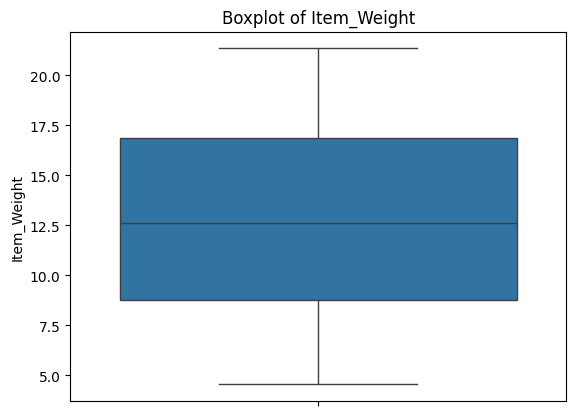

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.
import seaborn as sns

# Create histograms for numeric columns
sns.boxplot(y=df["Item_Weight"])
plt.title("Boxplot of Item_Weight")
plt.ylabel("Item_Weight")
plt.show()

<ipython-input-11-647f22dd9967>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outlet_Size", palette="viridis")


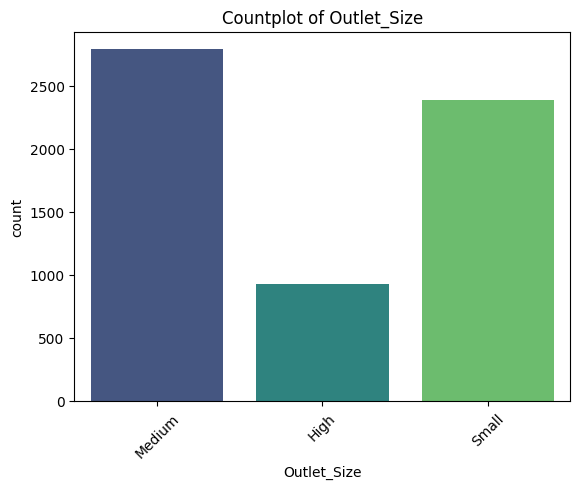

In [ ]:
#Countplots to view the frequency of each class of categorial features in your dataset.
sns.countplot(data=df, x="Outlet_Size", palette="viridis")
plt.xticks(rotation=45)
plt.title(f"Countplot of Outlet_Size")

plt.show()

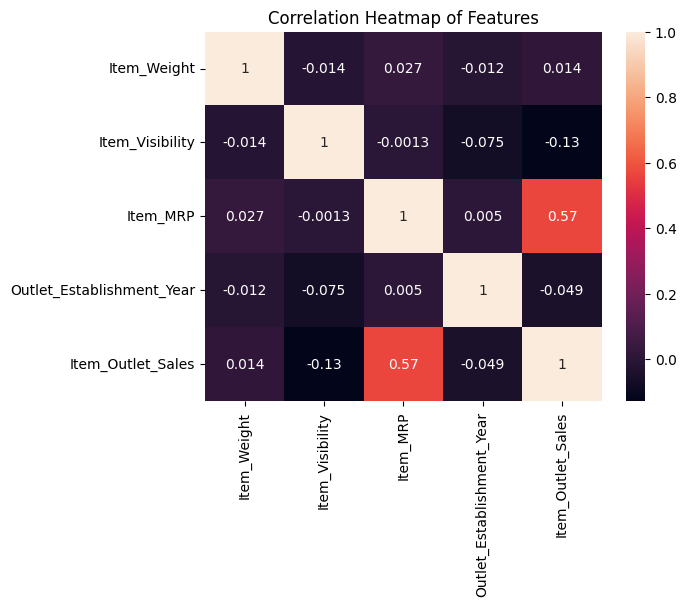

In [ ]:
#Heatmap to view the correlation between features.
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

Feature Inspection

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Copy of dataframe just for visualization and EDA
temp_df = df.copy()

#EDA Fuctions

In [44]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [17]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


#feature: Item_Weight

In [46]:
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

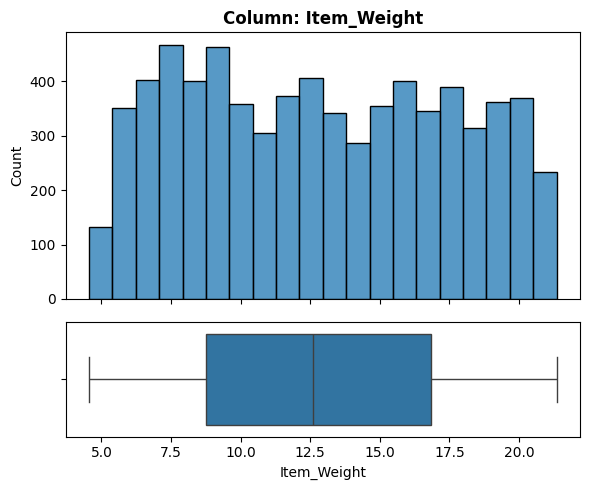

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [21]:
explore_numeric(temp_df, feature)

**Feature Observations**

**What type of feature is it? (Categorical (nominal), ordinal, numeric)**

numeric

**How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)**

NaN's Found: 1463 (17.17%)

**Is the feature constant or quasi-constant?**

No.


**Would we know this BEFORE the target is determined?**

Yes.

**Is there a business case/understanding reason to exclude based on our business case?**

No.

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

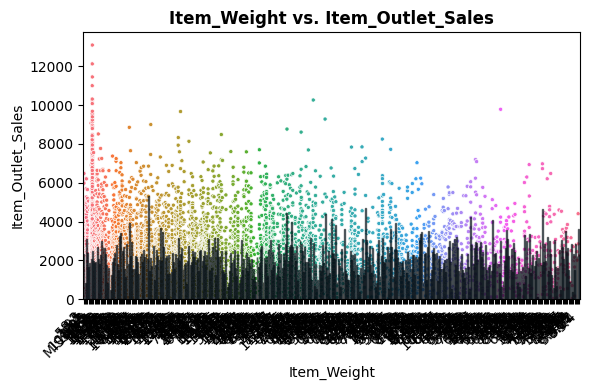

In [47]:
plot_categorical_vs_target(df, feature)

Based on your business understanding, would you expect this feature to be a predictor of the target? No

Does this feature appear to be a predictor of the target? No

#feature: Item_Fat_Content




In [48]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-17-5aff65317a6b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


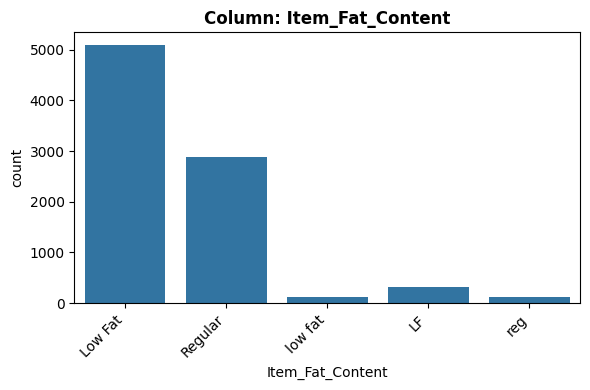

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [23]:
explore_categorical(df,feature);

**Feature Observations**

**What type of feature is it? (Categorical (nominal), ordinal, numeric)**

nominal

**How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)**

NaN's Found: 0 (0.0%)

**Is the feature constant or quasi-constant?**

No


**Would we know this BEFORE the target is determined?**

Yes

**Is there a business case/understanding reason to exclude based on our business case?**

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

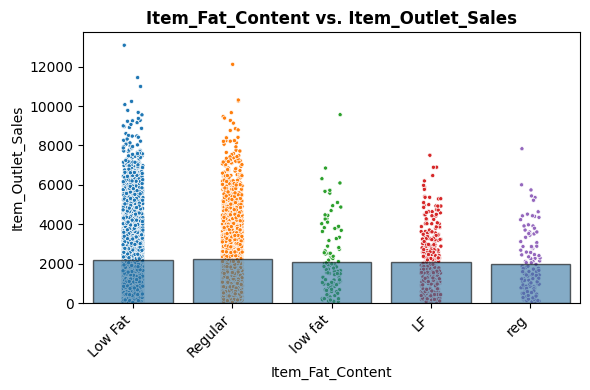

In [49]:
plot_categorical_vs_target(df, feature)

#feature: Item_Visibility

In [52]:
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

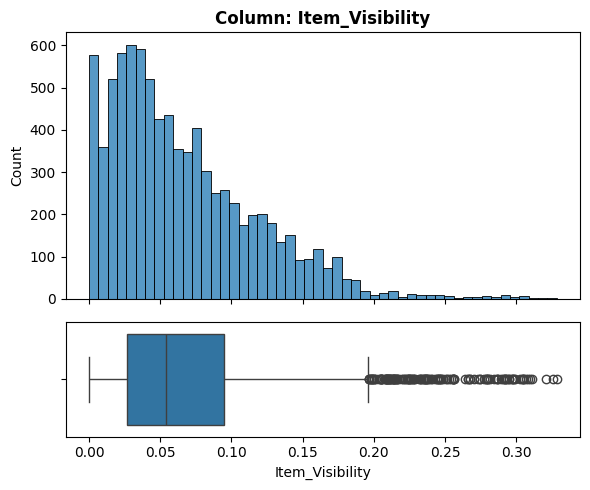

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [25]:
explore_numeric(temp_df, feature)

**Feature Observations**

**What type of feature is it? (Categorical (nominal), ordinal, numeric)**

numeric

**How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)**

NaN's Found: 0 (0.0%)

**Is the feature constant or quasi-constant?**

No


**Would we know this BEFORE the target is determined?**

Yes

**Is there a business case/understanding reason to exclude based on our business case?**

No

#feature: Item_Type

In [54]:
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-17-5aff65317a6b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


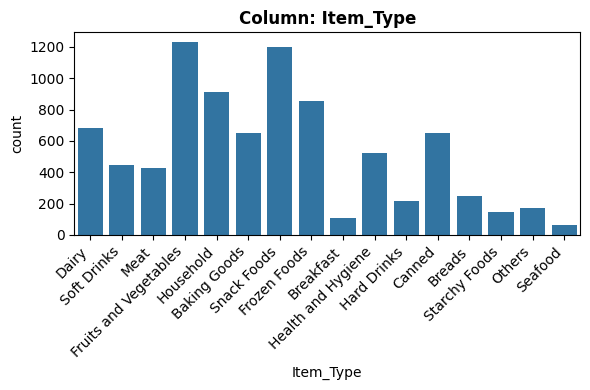

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [55]:
explore_categorical(df,feature);

**Feature Observations**

**What type of feature is it? (Categorical (nominal), ordinal, numeric)**

categoral

**How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)**

NaN's Found: 0 (0.0%)

**Is the feature constant or quasi-constant?**

No


**Would we know this BEFORE the target is determined?**

Yes

**Is there a business case/understanding reason to exclude based on our business case?**

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

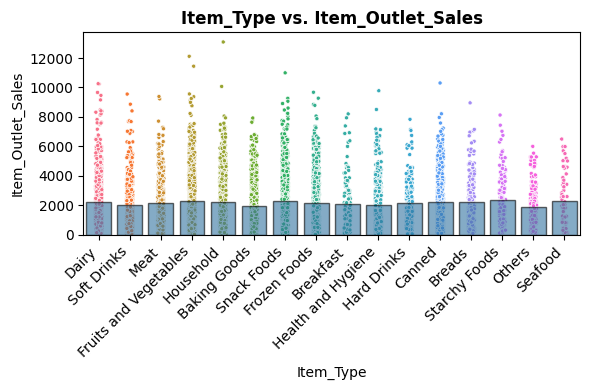

In [56]:
plot_categorical_vs_target(df, feature)

#feature: Item_MRP

In [57]:
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

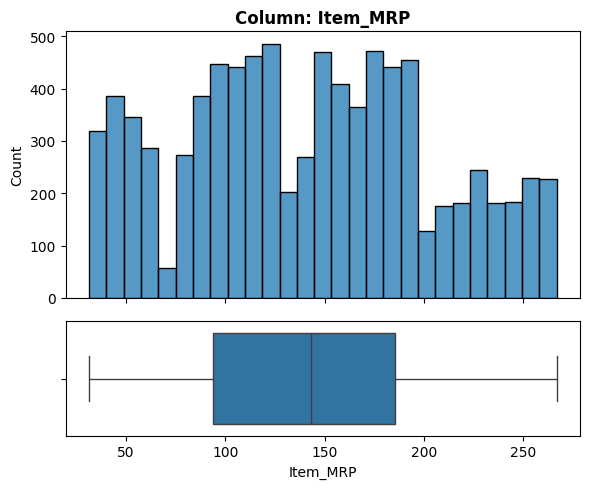

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [29]:
explore_numeric(temp_df, feature)

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 0 (0.0%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

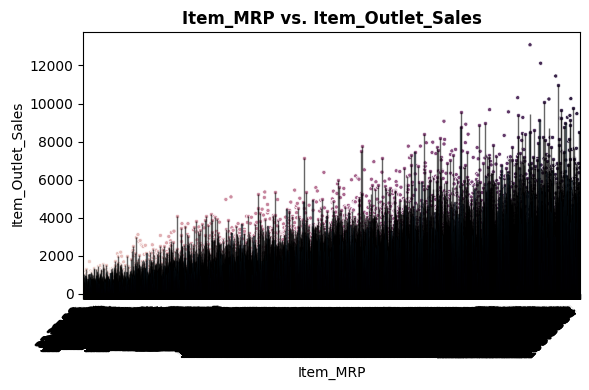

In [58]:
plot_categorical_vs_target(df, feature)

#feature: Item_MRP

In [59]:
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

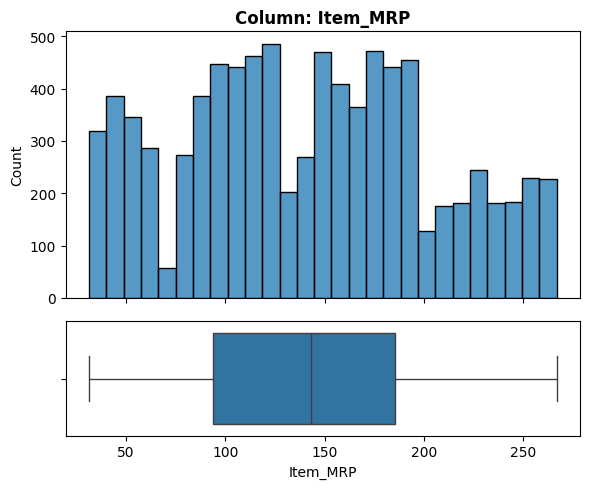

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [31]:
explore_numeric(temp_df, feature)

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 0 (0.0%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

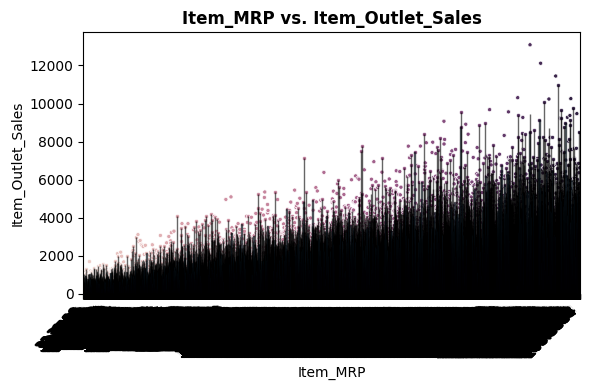

In [60]:
plot_categorical_vs_target(df, feature)

#feature: Outlet_Establishment_Year

In [61]:
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

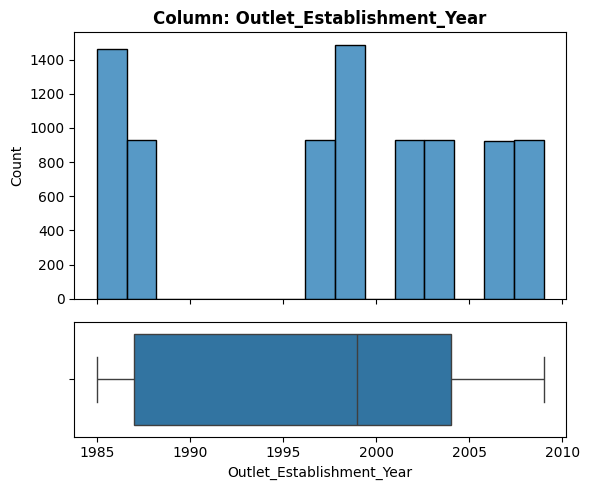

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [39]:
explore_numeric(temp_df, feature)

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 0 (0.0%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

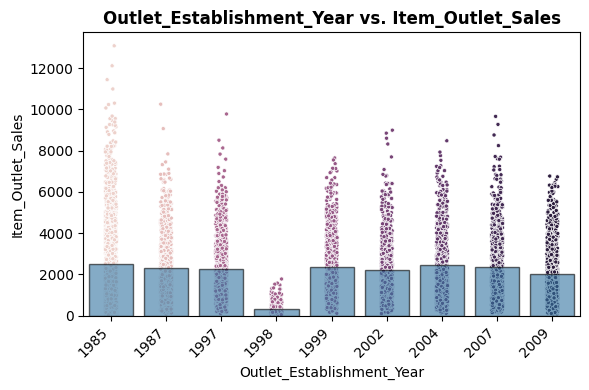

In [62]:
plot_categorical_vs_target(df, feature)

#feature: Outlet_Size

In [63]:
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-17-5aff65317a6b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


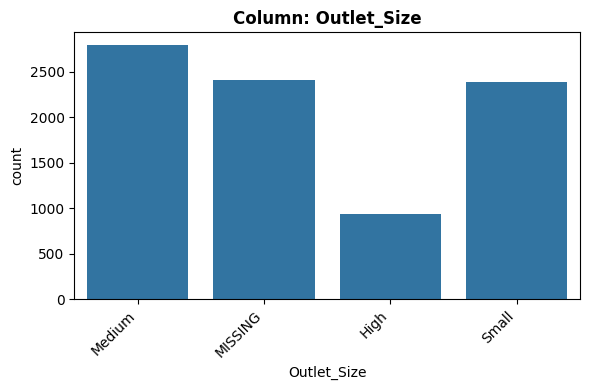

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [37]:
explore_categorical(df,feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

nominal

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 2410 (28.28%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

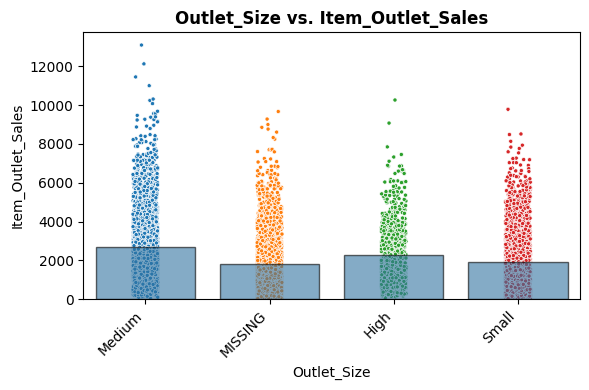

In [64]:
plot_categorical_vs_target(df, feature)

#feature: Outlet_Location_Type

In [65]:
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-17-5aff65317a6b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


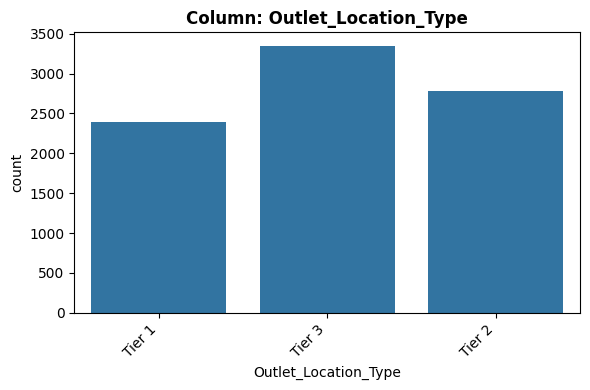

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [35]:
explore_categorical(df,feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

nominal

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 0 (0.0%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

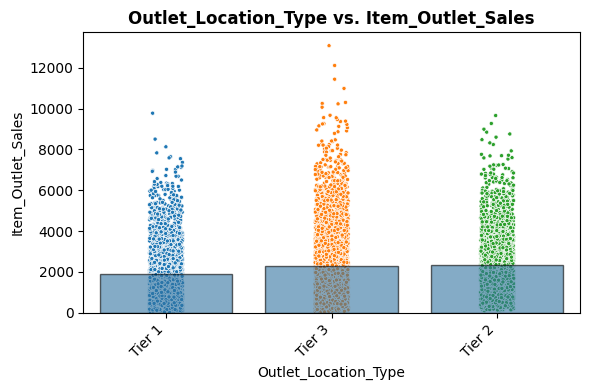

In [66]:
plot_categorical_vs_target(df, feature)

#feature: Outlet_Type

In [67]:
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-17-5aff65317a6b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


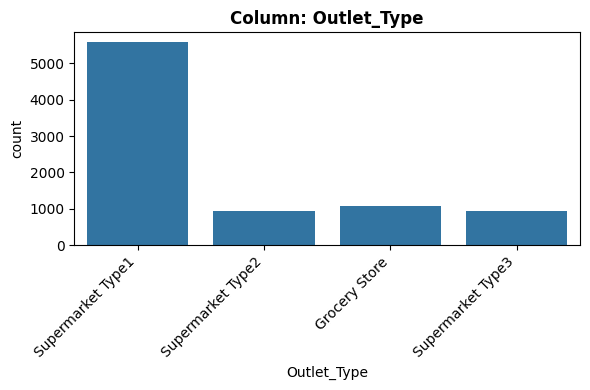

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [33]:
explore_categorical(df,feature);

Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)

nominal

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

NaN's Found: 0 (0.0%)

Is the feature constant or quasi-constant?

No

Would we know this BEFORE the target is determined?

Yes

Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-44-77024fc49488>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

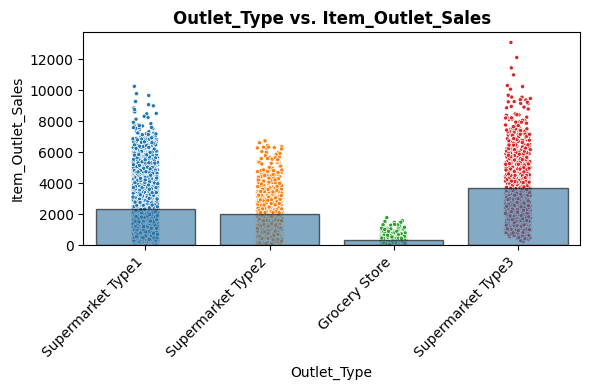

In [68]:
plot_categorical_vs_target(df, feature)